# Numerical Methods

Most algorithms rely on

1. solving simultaneous, linear equations $A {\bf x} = {\bf b}$;
2. solving nonlinear equations ${\bf f}({\bf x}) = {\bf 0}$;
3. representing functions $f(x)$ with a finite amount of data;
4. taking eg Fourier transforms;
5. stochastic methods.

Numerical relativity concentrates on the first three.

# Finite differencing

* Assume $f(x)$ known at $\{x_i\}$.
* Set $g(x)$ to polynomial, $g(x_i) = f(x_i)$.
* Approximate: $f'(x) \simeq g'(x)$.

Higher order polynomials give higher order accuracy.

May need to choose $\{x_i\}$ carefully.

In [1]:
%matplotlib inline
from matplotlib import pyplot
import numpy

def linear_interpolation(f, x_points):
    """
    Return the function that linearly interpolates f at the two x_points, and its derivative.
    """
    
    xi, xip = x_points
    
    g = lambda x : (x - xip) / (xi - xip) * f(xi) + (x - xi) / (xip - xi) * f(xip)
    dg = lambda x : f(xi) / (xi - xip) + f(xip) / (xip - xi)
    
    return g, dg

def quadratic_interpolation(f, x_points):
    """
    Return the function that quadratically interpolates f at the two x_points, and its derivative.
    """
    
    xim, xi, xip = x_points
    
    g = lambda x : (x - xi ) * (x - xip) / (xim - xi ) / (xim - xip) * f(xim) + \
                   (x - xim) * (x - xip) / (xi  - xim) / (xi  - xip) * f(xi ) + \
                   (x - xim) * (x - xi ) / (xip - xim) / (xip - xi ) * f(xip)
    dg = lambda x : (2.0*x - xi  - xip) / (xim - xi ) / (xim - xip) * f(xim) + \
                    (2.0*x - xim - xip) / (xi  - xim) / (xi  - xip) * f(xi ) + \
                    (2.0*x - xim - xi ) / (xip - xim) / (xip - xi ) * f(xip)
    
    return g, dg

In [2]:
def linear_interpolated_data(f, x, n_intervals):
    """
    Takes the x coordinates and interpolates f(x) over n_intervals (ie, at n_intervals+1 equally spaced points),
    returning the interpolated values at coordinates x.
    """
    
    n_interp_points = int((len(x)-1)/n_intervals)
    x_interpolant = numpy.linspace(0, 1, n_intervals+1)
    g_fd = numpy.zeros_like(x)
    dg_fd = numpy.zeros_like(x)
    
    for i in range(n_intervals):
        g, dg = linear_interpolation(f, 
                                     [x_interpolant[i], 
                                      x_interpolant[i+1]])
        g_fd[n_interp_points*i:n_interp_points*(i+1)] = g(x[n_interp_points*i:n_interp_points*(i+1)])
        dg_fd[n_interp_points*i:n_interp_points*(i+1)] = dg(x[n_interp_points*i:n_interp_points*(i+1)])
    g_fd[-1] = g(x[-1])
    dg_fd[-1] = dg(x[-1])
    
    return g_fd, dg_fd

def quadratic_interpolated_data(f, x, n_intervals):
    """
    Takes the x coordinates and interpolates f(x) over n_intervals (ie, at n_intervals+1 equally spaced points),
    returning the interpolated values at coordinates x.
    """
    
    n_interp_points = int((len(x)-1)/n_intervals)
    x_interpolant = numpy.linspace(0, 1, n_intervals+1)
    g_cd = numpy.zeros_like(x)
    dg_cd = numpy.zeros_like(x)
    
    for i in range(1, n_intervals, 2):
        g, dg = quadratic_interpolation(f, 
                                        [x_interpolant[i-1], 
                                         x_interpolant[i], 
                                         x_interpolant[i+1]])
        g_cd[n_interp_points*(i-1):n_interp_points*(i+1)] = g(x[n_interp_points*(i-1):n_interp_points*(i+1)])
        dg_cd[n_interp_points*(i-1):n_interp_points*(i+1)] = dg(x[n_interp_points*(i-1):n_interp_points*(i+1)])
    g_cd[-1] = g(x[-1])
    dg_cd[-1] = dg(x[-1])
    
    return g_cd, dg_cd

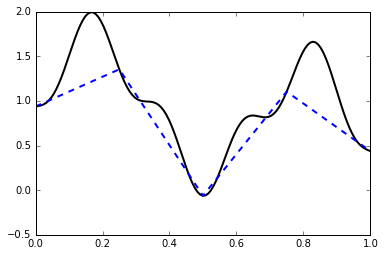

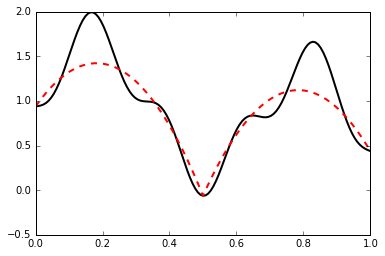

In [3]:
def f(x):
    return 1-(x-0.25)**2+numpy.sin(3*numpy.pi*x)**3

x = numpy.linspace(0, 1, 129)
n_intervals = 4

g_fd, dg_fd = linear_interpolated_data(f, x, 
                                       n_intervals)
g_cd, dg_cd = quadratic_interpolated_data(f, x, 
                                          n_intervals)

pyplot.figure()
pyplot.plot(x, f(x), 'k-', lw=2)
pyplot.plot(x, g_fd, 'b--', lw=2)
pyplot.figure()
pyplot.plot(x, f(x), 'k-', lw=2)
pyplot.plot(x, g_cd, 'r--', lw=2)
pyplot.show()

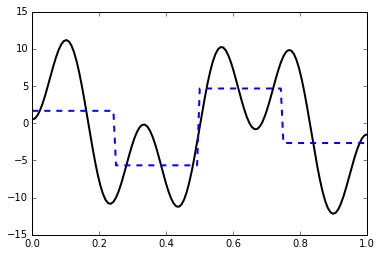

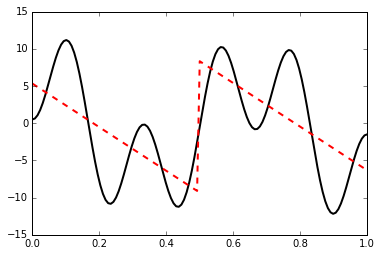

In [4]:
def df(x):
    return -2*(x-0.25)+9*numpy.pi*\
           numpy.sin(3*numpy.pi*x)**2*\
           numpy.cos(3*numpy.pi*x)

n_intervals = 4

g_fd, dg_fd = linear_interpolated_data(f, x, 
                                       n_intervals)
g_cd, dg_cd = quadratic_interpolated_data(f, x, 
                                          n_intervals)

pyplot.figure()
pyplot.plot(x, df(x), 'k-', lw=2)
pyplot.plot(x, dg_fd, 'b--', lw=2)
pyplot.figure()
pyplot.plot(x, df(x), 'k-', lw=2)
pyplot.plot(x, dg_cd, 'r--', lw=2)
pyplot.show()

## Finite differencing formulas

Equally spaced grid, $\Delta x$:


\begin{align}
  \text{Forwards:} && \left. \frac{\partial f}{\partial x} \right|_{x = x_i} &= \frac{1}{\Delta x} \left( f_{i+1} - f_i \right) + {\cal O} \left( \Delta x \right), \\
  \text{Backwards:} && \left. \frac{\partial f}{\partial x} \right|_{x = x_i} &= \frac{1}{\Delta x} \left( f_{i} - f_{i-1} \right) + {\cal O} \left( \Delta x \right), \\
  \text{Central:} && \left. \frac{\partial f}{\partial x} \right|_{x = x_i} &= \frac{1}{2 \, \Delta x} \left( f_{i+1} - f_{i-1} \right) + {\cal O} \left( \Delta x^2 \right), \\
  \text{Central:} && \left. \frac{\partial^2 f}{\partial x^2} \right|_{x = x_i} &= \frac{1}{\left( \Delta x \right)^2} \left( f_{i-1} - 2 f_i + f_{i+1} \right) + {\cal O} \left( \Delta x^2 \right).
\end{align}

In [5]:
def backward_differencing(f, x_i, dx):
    f_i = f(x_i)
    f_i_minus_1 = f(x_i - dx)
    return (f_i - f_i_minus_1) / dx

def forward_differencing(f, x_i, dx):
    f_i = f(x_i)
    f_i_plus_1 = f(x_i + dx)
    return (f_i_plus_1 - f_i) / dx

def central_differencing(f, x_i, dx):
    f_i = f(x_i)
    f_i_minus_1 = f(x_i - dx)
    f_i_plus_1 = f(x_i + dx)
    diff_1 = (f_i_plus_1-f_i_minus_1)/(2.0*dx)
    diff_2 = (f_i_minus_1-2.0*f_i+f_i_plus_1)/(dx**2)
    return diff_1, diff_2

dx = 0.1
bd = backward_differencing(numpy.exp, 0.0, dx)
fd = forward_differencing(numpy.exp, 0.0, dx)
cd1, cd2 = central_differencing(numpy.exp, 0.0, dx)


print("Find derivatives of exp(x), x=0.\n")
print("Backward:")
print("Value is {:4.2f}, error {:7.2e}\n".format(bd, abs(bd - 1.0)))
print("Forward:")
print("Value is {:4.2f}, error {:7.2e}\n".format(fd, abs(fd - 1.0)))
print("Central (1st derivative):")
print("Value is {:4.2f}, error {:7.2e}\n".format(cd1, abs(cd1 - 1.0)))
print("Central (2 derivatives):")
print("Value is {:4.2f}, error {:7.2e}".format(cd2, abs(cd2 - 1.0)))

Find derivatives of exp(x), x=0.

Backward:
Value is 0.95, error 4.84e-02

Forward:
Value is 1.05, error 5.17e-02

Central (1st derivative):
Value is 1.00, error 1.67e-03

Central (2 derivatives):
Value is 1.00, error 8.34e-04


# Convergence

Error must go to zero with approximation "scale". Here

$$
  {\cal E} = C \left( \Delta x \right)^p, \qquad p > 0.
$$

Need experimental evidence for this. Rewrite as

$$
  \log \left( {\cal E} \right) = p \log \left( \Delta x \right) + \text{constant},
$$

and find $p$ as the resulting "slope".

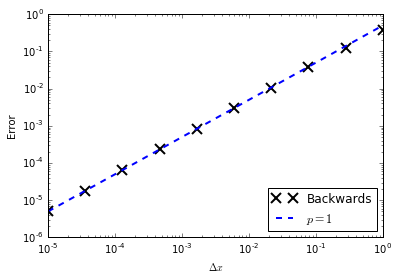

In [6]:
dxs = numpy.logspace(-5, 0, 10)
bd_errors = numpy.zeros_like(dxs)

for i, dx in enumerate(dxs):
    bd = backward_differencing(numpy.exp, 0.0, dx)
    bd_errors[i] = abs(bd - 1.0)
    
pyplot.figure()
pyplot.loglog(dxs, bd_errors, 'kx', ms=10, mew=2,
              label='Backwards')
pyplot.loglog(dxs, dxs*(bd_errors[0]/dxs[0]), 
              'b--', lw=2, label=r"$p=1$")
pyplot.xlabel(r"$\Delta x$")
pyplot.ylabel("Error")
pyplot.legend(loc="lower right")
pyplot.show()

# Exercises

1. Check the convergence rate of the other differencing methods.
2. Do you see why there's issues with the second derivative case?
3. Check convergence for fourth order differencing.
4. Rather than a visual check, *measure* the convergence rate. How close should it be?
5. Look at self convergence.